# ML Foreclosure Binary Classification - 10% sample dataset
Only "resolved" outcomes - Either paid off or default 

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured
        * 06 = Repurchased
        * 16 = Reperforming Loan Sale

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *
pd.set_option('display.max_columns', None)


# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [2]:
df=pd.read_csv("data/FM_Acq2_Perf_FMAC2_loanAge_sample10.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,monMatur,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,1541969,1541969,146748469526,C,"IRWIN MORTGAGE, CORPORATION",6.250,25000,360,2004-05-01,79.0,79.0,1.0,35.0,C,IA,508,0.0,0.0,651.0,651.0,651.0,105,255.0,0,1.0,77,27,27.0,6.34,6.12,6.270,0.035948,4.53,-0.090,-0.130,-0.020,-0.014196,-0.021242,-0.003190
1,632878,632878,240610336325,R,SUNTRUST MORTGAGE INC.,6.500,150000,360,2002-08-01,67.0,67.0,2.0,52.0,C,FL,339,0.0,0.0,700.0,671.0,685.5,49,311.0,39460,1.0,41,3,1.0,6.43,6.22,6.290,0.033762,4.47,0.070,-0.280,0.210,0.010886,-0.045016,0.033386
2,2594139,2594139,859946282181,R,QUICKEN LOANS INC.,3.990,75000,180,2014-08-01,65.0,65.0,2.0,12.0,C,MI,483,0.0,0.0,658.0,629.0,643.5,25,155.0,19820,1.0,24,1,1.0,4.14,4.10,4.115,0.009756,2.52,-0.150,0.110,-0.125,-0.036232,0.026829,-0.030377
3,74236,74236,594440322319,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,124000,360,2000-09-01,80.0,80.0,2.0,42.0,P,WI,530,0.0,0.0,671.0,658.0,664.5,15,345.0,33340,1.0,8,7,1.0,7.96,7.88,7.912,0.010152,5.68,0.165,-0.245,0.213,0.020729,-0.031091,0.026921
4,1192968,1192968,273895531783,C,OTHER,4.875,38000,120,2003-08-01,40.0,40.0,2.0,19.0,R,MN,559,0.0,0.0,727.0,727.0,727.0,66,54.0,0,1.0,65,1,1.0,6.34,6.14,6.264,0.032573,4.44,-1.465,1.265,-1.389,-0.231073,0.206026,-0.221743


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266326 entries, 0 to 266325
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          266326 non-null  int64  
 1   Unnamed: 0.1        266326 non-null  int64  
 2   id                  266326 non-null  int64  
 3   origChannel         266326 non-null  object 
 4   sellerName          266326 non-null  object 
 5   origIntRate         266326 non-null  float64
 6   origUPB             266326 non-null  int64  
 7   origLoanTerm        266326 non-null  int64  
 8   origDate            266326 non-null  object 
 9   origLTV             266326 non-null  float64
 10  origCLTV            266326 non-null  float64
 11  numBorrowers        266326 non-null  float64
 12  origDebtIncRatio    266326 non-null  float64
 13  loanPurp            266326 non-null  object 
 14  propState           266326 non-null  object 
 15  zipCode             266326 non-nul

## Remove columns not involved in 'Foreclosure or Not' query

In [4]:
df.drop(['Unnamed: 0','id','fredRate','monMatur','deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266326 entries, 0 to 266325
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        266326 non-null  int64  
 1   origChannel         266326 non-null  object 
 2   sellerName          266326 non-null  object 
 3   origIntRate         266326 non-null  float64
 4   origUPB             266326 non-null  int64  
 5   origLoanTerm        266326 non-null  int64  
 6   origDate            266326 non-null  object 
 7   origLTV             266326 non-null  float64
 8   origCLTV            266326 non-null  float64
 9   numBorrowers        266326 non-null  float64
 10  origDebtIncRatio    266326 non-null  float64
 11  loanPurp            266326 non-null  object 
 12  propState           266326 non-null  object 
 13  zipCode             266326 non-null  int64  
 14  pMIperct            266326 non-null  float64
 15  mortInsType         266326 non-nul

### Check if any columns have a null value

In [6]:
df.apply(lambda x: x.isnull().sum(), axis=0)

Unnamed: 0.1          0
origChannel           0
sellerName            0
origIntRate           0
origUPB               0
origLoanTerm          0
origDate              0
origLTV               0
origCLTV              0
numBorrowers          0
origDebtIncRatio      0
loanPurp              0
propState             0
zipCode               0
pMIperct              0
mortInsType           0
bestCreditScore       0
worstCreditScore      0
avgCreditScore        0
loanAge               0
mSA                   0
zeroBalCode           0
fmacRateMax           0
fmacRateMin           0
fmacRateAvg           0
fmacRateVolatility    0
rateDiffAbove         0
rateDiffBelow         0
rateDiffAvg           0
rateDiffAbovePct      0
rateDiffBelowPct      0
rateDiffAvgPct        0
dtype: int64

## Engineer originDate into Date features

In [7]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [8]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [9]:
df.drop(['origDate'],1,inplace=True)

In [10]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2004,5
1,2002,8
2,2014,8
3,2000,9
4,2003,8


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [11]:
df.zeroBalCode.unique()

array([ 1.,  9., 16.,  6.,  3.,  2., 15.])

In [12]:
df['zeroBalCode'] = df.zeroBalCode.replace([1,6,16],0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,2,15],1)

In [13]:
df.zeroBalCode.unique()

array([0., 1.])

In [14]:
#Checking datatypes of individual feature
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,1541969,C,"IRWIN MORTGAGE, CORPORATION",6.250,25000,360,79.0,79.0,1.0,35.0,C,IA,508,0.0,0.0,651.0,651.0,651.0,105,0,0.0,6.34,6.12,6.270,0.035948,-0.090,-0.130,-0.020,-0.014196,-0.021242,-0.003190,2004,5
1,632878,R,SUNTRUST MORTGAGE INC.,6.500,150000,360,67.0,67.0,2.0,52.0,C,FL,339,0.0,0.0,700.0,671.0,685.5,49,39460,0.0,6.43,6.22,6.290,0.033762,0.070,-0.280,0.210,0.010886,-0.045016,0.033386,2002,8
2,2594139,R,QUICKEN LOANS INC.,3.990,75000,180,65.0,65.0,2.0,12.0,C,MI,483,0.0,0.0,658.0,629.0,643.5,25,19820,0.0,4.14,4.10,4.115,0.009756,-0.150,0.110,-0.125,-0.036232,0.026829,-0.030377,2014,8
3,74236,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,124000,360,80.0,80.0,2.0,42.0,P,WI,530,0.0,0.0,671.0,658.0,664.5,15,33340,0.0,7.96,7.88,7.912,0.010152,0.165,-0.245,0.213,0.020729,-0.031091,0.026921,2000,9
4,1192968,C,OTHER,4.875,38000,120,40.0,40.0,2.0,19.0,R,MN,559,0.0,0.0,727.0,727.0,727.0,66,0,0.0,6.34,6.14,6.264,0.032573,-1.465,1.265,-1.389,-0.231073,0.206026,-0.221743,2003,8


# Review values for dates and slice (if needed) the timeframe you want

In [15]:
df.origYear.unique()

array([2004, 2002, 2014, 2000, 2003, 2005, 2012, 2007, 2006, 2008, 2009,
       2001, 2013, 2011, 2016, 2010, 2015, 2018, 2017, 1999, 2019],
      dtype=int64)

In [16]:
df['origMonth'].unique()

array([ 5,  8,  9,  4, 10,  2,  6,  1, 12,  3,  7, 11], dtype=int64)

In [17]:
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,1541969,C,"IRWIN MORTGAGE, CORPORATION",6.250,25000,360,79.0,79.0,1.0,35.0,C,IA,508,0.0,0.0,651.0,651.0,651.0,105,0,0.0,6.34,6.12,6.270,0.035948,-0.090,-0.130,-0.020,-0.014196,-0.021242,-0.003190,2004,5
1,632878,R,SUNTRUST MORTGAGE INC.,6.500,150000,360,67.0,67.0,2.0,52.0,C,FL,339,0.0,0.0,700.0,671.0,685.5,49,39460,0.0,6.43,6.22,6.290,0.033762,0.070,-0.280,0.210,0.010886,-0.045016,0.033386,2002,8
2,2594139,R,QUICKEN LOANS INC.,3.990,75000,180,65.0,65.0,2.0,12.0,C,MI,483,0.0,0.0,658.0,629.0,643.5,25,19820,0.0,4.14,4.10,4.115,0.009756,-0.150,0.110,-0.125,-0.036232,0.026829,-0.030377,2014,8
3,74236,R,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,8.125,124000,360,80.0,80.0,2.0,42.0,P,WI,530,0.0,0.0,671.0,658.0,664.5,15,33340,0.0,7.96,7.88,7.912,0.010152,0.165,-0.245,0.213,0.020729,-0.031091,0.026921,2000,9
4,1192968,C,OTHER,4.875,38000,120,40.0,40.0,2.0,19.0,R,MN,559,0.0,0.0,727.0,727.0,727.0,66,0,0.0,6.34,6.14,6.264,0.032573,-1.465,1.265,-1.389,-0.231073,0.206026,-0.221743,2003,8


In [18]:
#df = fillna(df)

# Coerce the column dtype (int in this case)

In [19]:
df = df.astype({'origLTV':'int','origCLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'mortInsType':'int','bestCreditScore':'int','loanAge':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266326 entries, 0 to 266325
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        266326 non-null  int64  
 1   origChannel         266326 non-null  object 
 2   sellerName          266326 non-null  object 
 3   origIntRate         266326 non-null  float64
 4   origUPB             266326 non-null  int64  
 5   origLoanTerm        266326 non-null  int64  
 6   origLTV             266326 non-null  int32  
 7   origCLTV            266326 non-null  int32  
 8   numBorrowers        266326 non-null  int32  
 9   origDebtIncRatio    266326 non-null  int32  
 10  loanPurp            266326 non-null  object 
 11  propState           266326 non-null  object 
 12  zipCode             266326 non-null  int64  
 13  pMIperct            266326 non-null  float64
 14  mortInsType         266326 non-null  int32  
 15  bestCreditScore     266326 non-nul

<a id='MLReady'></a>

# Oversampling (Since we are starting with only 14.52% of our predicted class)

In [21]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good + bad)*100,2)
print(f'We have {perct_bad}% Foreclosures in our dataset')

We have 14.53% Foreclosures in our dataset


In [22]:
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(
    df.drop(['zeroBalCode'], axis=1)
    , df['zeroBalCode']
    , test_size = .1
    , random_state=12
)

In [23]:
# Further split the training data into training/test
x_train, x_val, y_train, y_val = train_test_split(
    training_features
    , training_target
    , test_size = .1
    ,random_state=12
)

In [24]:
# For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [25]:
print('#############################################')
print('Before oversampling: "Closed" crushes "Default" and causes issues:')
print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

#############################################
Before oversampling: "Closed" crushes "Default" and causes issues:
0    204921
1     34772
Name: zeroBalCode, dtype: int64


# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [26]:
y_train.shape

(215723,)

In [27]:
df = x_train.copy()

In [28]:
df['zeroBalCode'] = y_train

In [29]:
df.shape

(215723, 33)

# Review metrics last time before run (to have record of starting values)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215723 entries, 17506 to 114576
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        215723 non-null  int64  
 1   origChannel         215723 non-null  object 
 2   sellerName          215723 non-null  object 
 3   origIntRate         215723 non-null  float64
 4   origUPB             215723 non-null  int64  
 5   origLoanTerm        215723 non-null  int64  
 6   origLTV             215723 non-null  int32  
 7   origCLTV            215723 non-null  int32  
 8   numBorrowers        215723 non-null  int32  
 9   origDebtIncRatio    215723 non-null  int32  
 10  loanPurp            215723 non-null  object 
 11  propState           215723 non-null  object 
 12  zipCode             215723 non-null  int64  
 13  pMIperct            215723 non-null  float64
 14  mortInsType         215723 non-null  int32  
 15  bestCreditScore     215723 non

In [31]:
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode
17506,2569897,R,OTHER,4.500,178000,360,97,97,2,34,P,OR,970,35.0,1,741,729,735,44,41420,4.28,4.10,4.1920,0.043902,0.220,-0.400,0.3080,0.051402,-0.097561,0.073473,2013,10,0
24119,1271261,C,"JPMORGAN CHASE BANK, NA",5.875,76000,180,30,30,1,31,R,DC,200,0.0,0,777,777,777,179,47900,5.94,5.40,5.6325,0.100000,-0.065,-0.475,0.2425,-0.010943,-0.087963,0.043054,2003,7,0
170279,1036923,B,"JPMORGAN CHASE BANK, NA",6.500,89000,360,80,80,2,18,C,MN,558,0.0,0,599,599,599,30,20260,5.85,5.79,5.8125,0.010363,0.650,-0.710,0.6875,0.111111,-0.122625,0.118280,2003,4,0
74642,703080,B,"JPMORGAN CHASE BANK, NA",5.375,31000,180,75,75,1,31,R,PA,179,0.0,0,693,693,693,126,0,6.31,5.98,6.1125,0.055184,-0.935,0.605,-0.7375,-0.148177,0.101171,-0.120654,2002,10,0
184025,2090081,C,AMTRUST BANK,6.625,310000,360,94,94,2,48,R,LA,705,30.0,1,667,663,665,119,29180,6.73,6.63,6.6950,0.015083,-0.105,0.005,-0.0700,-0.015602,0.000754,-0.010456,2007,7,0


# Pycaret - Setup with categorical definition

### Use complex setup 

In [32]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , normalize = True
    , transformation = False
    , pca = False 
    , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value. 
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True
    , remove_multicollinearity = True
    , polynomial_features = False
    , trigonometry_features = False
    , feature_selection = False
    , feature_interaction = False
    , fix_imbalance = True
    , silent = True
    , profile = False
    # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
#     , bin_numeric_features = [
#         'origIntRate'
#         , 'origUPB'
#         , 'origLTV'
#         , 'origDebtIncRatio'
#         , 'bestCreditScore'
#         , 'avgCreditScore'
#         , 'worstCreditScore'
#         ] # Set to True to bin numerics using K Means
    , categorical_features = [
         'origChannel'
        , 'loanPurp'
        , 'origYear'
        , 'origMonth'
        , 'mortInsType'
        , 'origLoanTerm'
        ]
    , high_cardinality_features = [
         'propState'
        , 'sellerName'
        , 'mSA'
        , 'zipCode'
    ]
    , high_cardinality_method = 'clustering'
    , numeric_features = [
        'origIntRate'
        , 'numBorrowers'
        , 'origUPB'
        , 'origLTV'
        , 'origCLTV'
        , 'pMIperct'
        , 'loanAge'
        , 'origDebtIncRatio'
        , 'worstCreditScore'
        , 'bestCreditScore'
        , 'avgCreditScore'
        , 'rateDiffAbove'
        , 'rateDiffBelow'
        , 'rateDiffAvg'
        , 'rateDiffAbovePct'
        , 'rateDiffBelowPct'
        , 'rateDiffAvgPct'
        , 'fmacRateMax'
        , 'fmacRateMin'
        , 'fmacRateAvg'
        , 'fmacRateVolatility'
    ]
)


Setup Succesfully Completed!


,Description,Value
0,session_id,8024
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(215723, 33)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,clustering


## Compare Models with no blacklist exclusions

In [33]:
model_results=compare_models(sort='AUC') #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8618,0.8248,0.2454,0.5784,0.3445,0.2811,0.3136,28.0920
1,Light Gradient Boosting Machine,0.8558,0.8187,0.2853,0.5238,0.3693,0.2958,0.3133,1.9531
2,Extreme Gradient Boosting,0.8570,0.8172,0.2699,0.5336,0.3584,0.2876,0.3088,12.4670
3,Gradient Boosting Classifier,0.8035,0.7988,0.5386,0.3834,0.4479,0.3325,0.3396,67.3126
4,Extra Trees Classifier,0.8472,0.7856,0.2623,0.4709,0.3369,0.2584,0.2725,10.4168
5,Linear Discriminant Analysis,0.7019,0.7813,0.7332,0.2957,0.4214,0.2666,0.3166,1.4714
6,Logistic Regression,0.7054,0.7806,0.7269,0.2975,0.4222,0.2685,0.3168,2.8184
7,Ada Boost Classifier,0.7561,0.7749,0.5987,0.3245,0.4209,0.2833,0.3046,15.4735
8,Random Forest Classifier,0.8382,0.7612,0.2900,0.4308,0.3466,0.2583,0.2649,1.0322
9,Naive Bayes,0.5007,0.7320,0.8342,0.2064,0.3310,0.1228,0.2006,0.1683


## Create models 

### Naive Bayes Classifier

In [34]:
nb = create_model('nb', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4995,0.7275,0.8305,0.2055,0.3295,0.1208,0.1974
1,0.5014,0.7384,0.8451,0.2083,0.3342,0.1267,0.2080
2,0.4997,0.7274,0.8216,0.2042,0.3271,0.1180,0.1920
3,0.4974,0.7264,0.8343,0.2053,0.3296,0.1206,0.1982
4,0.5075,0.7350,0.8413,0.2099,0.3359,0.1297,0.2103
5,0.4966,0.7393,0.8479,0.2069,0.3327,0.1244,0.2060
6,0.5022,0.7265,0.8234,0.2054,0.3288,0.1203,0.1951
7,0.4920,0.7277,0.8286,0.2027,0.3257,0.1152,0.1905
8,0.5060,0.7272,0.8249,0.2069,0.3308,0.1233,0.1989
9,0.5046,0.7443,0.8446,0.2093,0.3355,0.1287,0.2101


## Evaluate Models

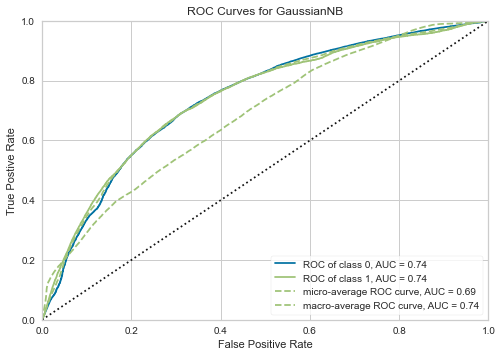

In [35]:
plot_model(nb)

In [36]:
#plot_model(nb, plot = 'threshold')

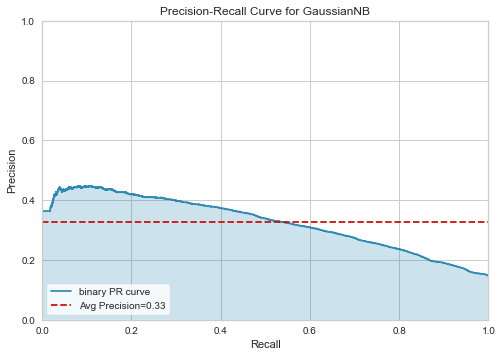

In [37]:
plot_model(nb, plot = 'pr')

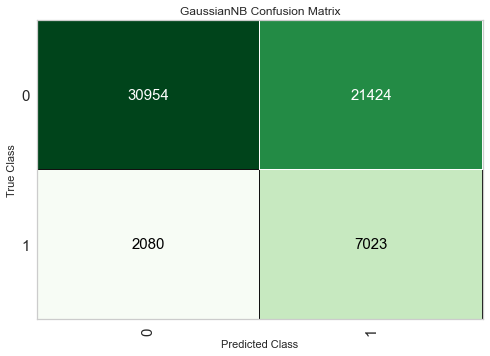

In [38]:
plot_model(nb, plot='confusion_matrix')

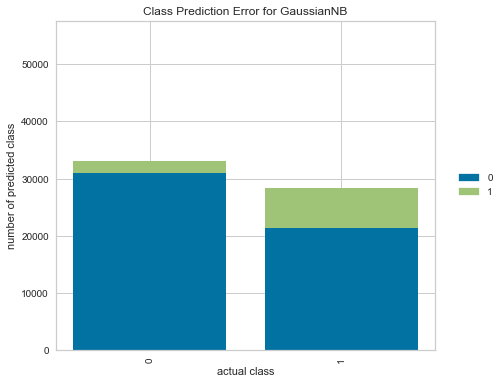

In [39]:
plot_model(nb, plot = 'error')

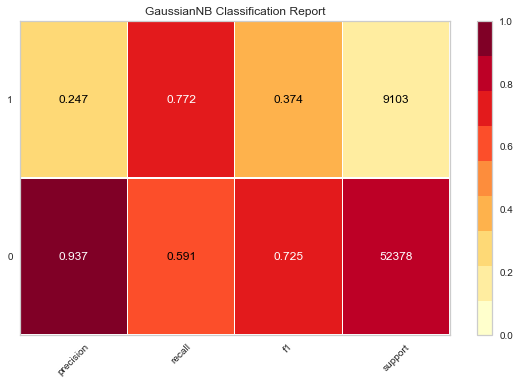

In [40]:
plot_model(nb, plot = 'class_report')

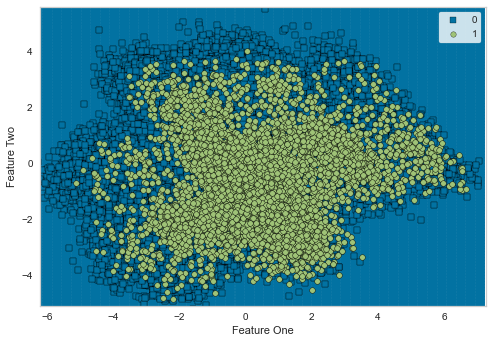

In [42]:
plot_model(nb, plot = 'boundary')

In [43]:
#plot_model(nb, plot='learning')

In [44]:
#plot_model(nb, plot = 'manifold')

In [45]:
#plot_model(nb, plot = 'calibration')

In [46]:
#plot_model(nb, plot = 'vc')

In [47]:
#plot_model(nb, plot='dimension')

In [48]:
#plot_model(nb, plot = 'feature')

In [49]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-09


# Predict models

In [50]:
predicted_et = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6177,0.7414,0.7715,0.2469,0.3741,0.193,0.2582


# The golden moment... put 10% sample test data through the models...

# Recombine test_features, test_target at first train/test/split
 This "test" set was split BEFORE Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will recombine the test_features and test_target into one new df

In [51]:
test_features.shape

(26633, 32)

In [52]:
test_target.shape

(26633,)

In [53]:
test_df = test_features.copy()

In [54]:
test_df['zeroBalCode'] = test_target

In [55]:
test_df.shape

(26633, 33)

In [56]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    22708
1     3925
Name: zeroBalCode, dtype: int64
Positive samples are 14.74%


## Create Confusion Matrix output functions

In [57]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalsePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalseNegative'
    else:
        value = 'Undefined'
    return value

In [58]:
def cM(df):
    print(f'           ##############################')
    print(f'           #             #              #')
    print(f'         0 #    {df["TrueNegative"]}     #     {df["FalsePositive"]}      #')
    print(f'  True     #             #              #')
    print(f'  Class    ##############################')
    print(f'           #             #              #')
    print(f'         1 #    {df["FalseNegative"]}      #     {df["TruePositive"]}      #')
    print(f'           #             #              #')
    print(f'           ##############################')
    print(f'                  0              1        ')
    print(f'                  Predicted Class           ')


In [59]:
def cMCalc():
    # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
    totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
    totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
    total = totalNegative + totalPositive
    trueNegativePct = confusionMatrix['TrueNegative'] / total * 100
    falseNegativePct = confusionMatrix['FalseNegative'] / total * 100
    truePositivePct = confusionMatrix['TruePositive'] / total * 100
    falsePositivePct = confusionMatrix['FalsePositive'] / total * 100

    # Accuracy Calculation
    accuracy = (confusionMatrix['TruePositive'] + confusionMatrix['TrueNegative'])/(totalPositive + totalNegative)
    # Recall Calculation
    recall = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalseNegative']))
    # Precision Calculation
    precision = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']))

    print(f'TrueNegative:  {round(trueNegativePct,2)}%')
    print(f'FalseNegative:  {round(falseNegativePct,2)}%')
    print(f'TruePositive:   {round(truePositivePct,2)}%')
    print(f'FalsePositive: {round(falsePositivePct,2)}%')
    print(f'#####################################################')
    print(f'Accuracy: {round(accuracy,2)*100}%   Recall: {round(recall,2)*100}%   Precision: {round(precision,2)*100}%')
    print(f'#####################################################')

# Evaluate Models

# Naive Bayes Classifier

In [176]:
tuned_nb = tune_model(nb, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5997,0.7389,0.7566,0.2352,0.3589,0.1718,0.2340
1,0.6060,0.7492,0.7820,0.2424,0.3701,0.1862,0.2541
2,0.6023,0.7402,0.7528,0.2358,0.3592,0.1726,0.2340
3,0.6005,0.7358,0.7669,0.2373,0.3624,0.1761,0.2407
4,0.6115,0.7472,0.7792,0.2449,0.3726,0.1902,0.2573
5,0.6024,0.7501,0.7843,0.2410,0.3686,0.1839,0.2524
6,0.6004,0.7389,0.7613,0.2363,0.3607,0.1740,0.2373
7,0.5954,0.7393,0.7646,0.2344,0.3588,0.1709,0.2350
8,0.6072,0.7410,0.7646,0.2403,0.3656,0.1811,0.2451
9,0.6102,0.7556,0.7877,0.2455,0.3744,0.1919,0.2610


In [177]:
calibrated_nb = calibrate_model(tuned_nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6232,0.7390,0.7345,0.2437,0.3660,0.1847,0.2418
1,0.6307,0.7493,0.7613,0.2523,0.3790,0.2014,0.2638
2,0.6291,0.7403,0.7387,0.2477,0.3710,0.1917,0.2494
3,0.6239,0.7358,0.7448,0.2458,0.3697,0.1892,0.2483
4,0.6353,0.7473,0.7556,0.2540,0.3802,0.2038,0.2647
5,0.6265,0.7501,0.7569,0.2492,0.3749,0.1959,0.2575
6,0.6260,0.7389,0.7392,0.2460,0.3692,0.1890,0.2469
7,0.6227,0.7393,0.7382,0.2440,0.3668,0.1856,0.2434
8,0.6316,0.7410,0.7425,0.2498,0.3738,0.1955,0.2539
9,0.6344,0.7556,0.7637,0.2548,0.3821,0.2058,0.2685


In [140]:
#optimize threshold for trained model
optimize_threshold(tuned_nb, true_negative = 1000, false_negative = -5000)

Optimized Probability Threshold: 0.88 | Optimized Cost Function: 22153000


In [166]:
final_nb = finalize_model(tuned_nb)

In [167]:
predictions = predict_model(final_nb, data=test_df)

In [168]:
pd.set_option('max_columns',None)
predictions.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,1362689,C,"JPMORGAN CHASE BANK, NA",6.000,42000,360,68,68,1,30,C,MO,656,0.0,0,698,698,698,99,44180,6.03,5.83,5.9325,0.034305,-0.030,-0.170,0.0675,-0.004975,-0.029160,0.011378,2003,11,1,1,0.6684
1,1450254,R,OTHER,5.375,63000,180,79,79,2,43,C,LA,703,0.0,0,665,636,650,100,12940,5.72,5.58,5.6350,0.025090,-0.345,0.205,-0.2600,-0.060315,0.036738,-0.046140,2004,2,0,1,0.5075
2,2306435,C,"BANK OF AMERICA, N.A.",5.000,256000,360,48,48,2,40,R,KY,410,0.0,0,771,769,770,95,17140,5.53,5.10,5.2860,0.084314,-0.530,0.100,-0.2860,-0.095841,0.019608,-0.054105,2008,12,0,0,0.0146
3,64951,B,OTHER,7.875,107000,240,80,80,2,28,P,CO,809,0.0,0,698,657,677,66,17820,8.12,7.96,8.0275,0.020101,-0.245,0.085,-0.1525,-0.030172,0.010678,-0.018997,2000,8,0,0,0.0476
4,1237528,B,"FLAGSTAR BANK, FSB",5.875,210000,240,71,71,1,49,C,NY,115,0.0,0,604,604,604,138,35620,6.34,6.14,6.2640,0.032573,-0.465,0.265,-0.3890,-0.073344,0.043160,-0.062101,2003,8,0,1,0.6378


In [169]:
results = predictions[['zeroBalCode','Label','Score']]

In [170]:
predictions.Label.value_counts()

0    17594
1     9039
Name: Label, dtype: int64

In [171]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [172]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [173]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    16256     #     6452      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    1338      #     2587      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [174]:
cMCalc()

TrueNegative:  61.04%
FalseNegative:  5.02%
TruePositive:   9.71%
FalsePositive: 24.23%
#####################################################
Accuracy: 71.0%   Recall: 66.0%   Precision: 28.999999999999996%
#####################################################


In [175]:
pred_holdout = predict_model(final_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6269,0.7423,0.7649,0.2508,0.3778,0.1992,0.2625


In [179]:
save_model(tuned_nb, 'np.tuned10pct_091920')

Transformation Pipeline and Model Succesfully Saved


In [137]:
#save_model(calibrated_et, 'extraTreesCalibrated2.5OS5050_082220')